<a href="https://colab.research.google.com/github/NastasiaMat/MathematicalModeling/blob/main/MathematicalModeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Моделирование сложных реакционных систем
Решение системы дифференциальных уравнений для кинетики сложных химических реакций 1-го порядка.

Построение кинетических кривых последовательных реакций (A -> B -> C).

Анализ влияния константы скорости (k2) на протекания реакций.

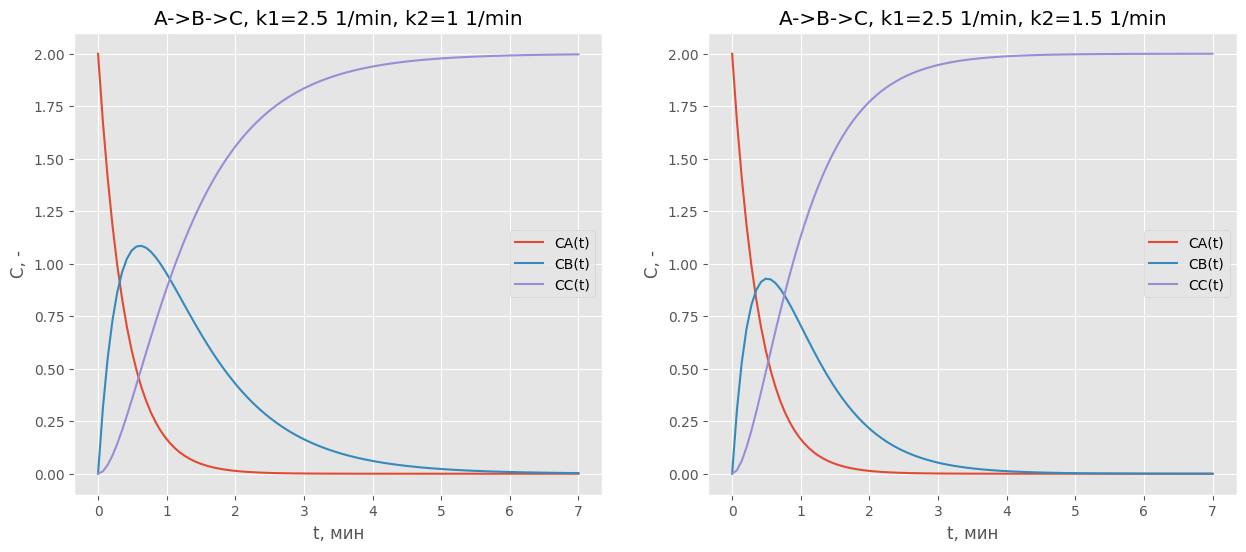

In [18]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
plt.style.use('ggplot')

# 1

# Решение системы дифф. уравнений:
def system_of_equations(y, t, k1, k2):
  CA, CB, CС = y
  dydt = [-k1 * CA,
          k1 * CA - k2 * CB,
          k2 * CB]
  return dydt

k1 = 2.5 # константа скорости 1-ой реакции
y0 = [2, 0, 0] # начальная концентрация веществ
t = np.linspace(0, 7, 101) # интервал времени исследования

# Влияние константы скорости:
k2 = 1
sol1 = odeint(system_of_equations, y0, t, args=(k1, k2))

k2 = 1.5
sol2 = odeint(system_of_equations, y0, t, args=(k1, k2))

# Построение кинетических кривых:
plt.figure(1, figsize = [15, 6])
plt.subplot(121, title = 'A->B->C, k1=2.5 1/min, k2=1 1/min',
            xlabel = 't, мин', ylabel = 'C, -')
plt.plot(t, sol1[:, 0], label='CA(t)')
plt.plot(t, sol1[:, 1], label='CB(t)')
plt.plot(t, sol1[:, 2], label='CС(t)')
plt.legend(loc='best')

plt.subplot(122, title = 'A->B->C, k1=2.5 1/min, k2=1.5 1/min',
            xlabel = 't, мин', ylabel = 'C, -')
plt.plot(t, sol2[:, 0], label='CA(t)')
plt.plot(t, sol2[:, 1], label='CB(t)')
plt.plot(t, sol2[:, 2], label='CС(t)')
plt.legend(loc='best')

plt.show()

# 2 Моделирование реакторов смешения переодического и непрерывного действия


1.   Составление и решение дифф. киетических уравнений параллельных химических реакций (B <- A -> C) для реакторов идеального смешения периодического (РИС-П) и непрерывного действия (РИС-Н).

  Построение кинетических кривых и анализ влияния констант скорости и вида реактора на протекание реакции.
  
2.   Исследование влияния объемного расхода и объема реактора на конверсию в РИС-Н.


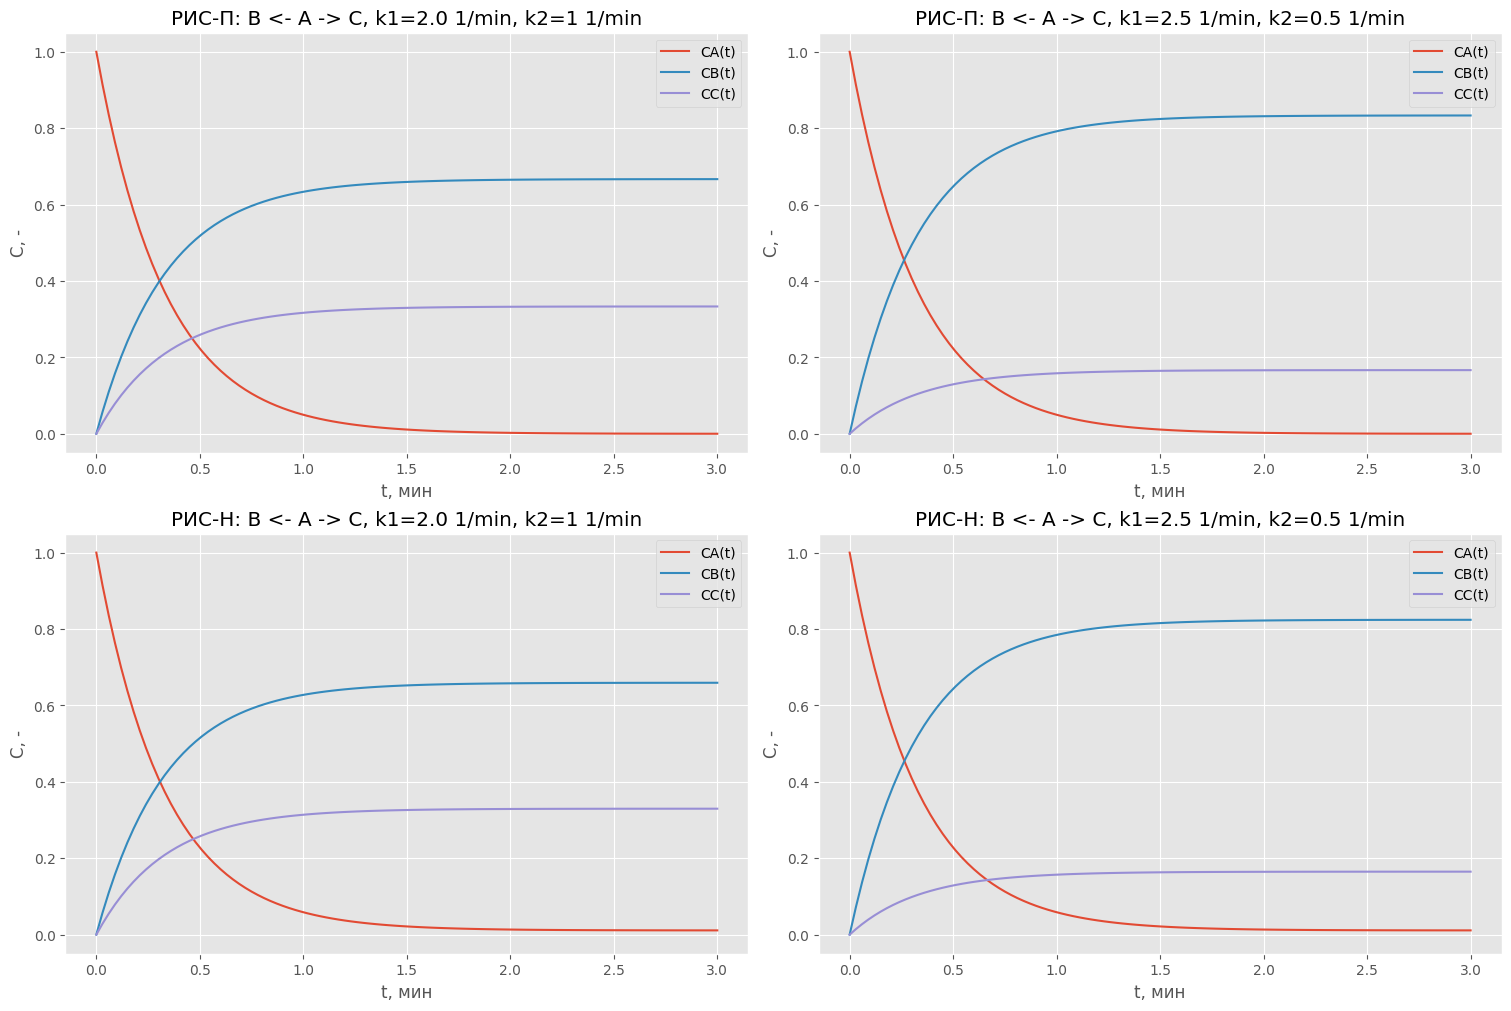

In [10]:
# 2.1

# Решение дифф. ур. для РИС-П :
def system_of_equations_batch_reactor(y, t, k1, k2):
  CA, CB, CС = y
  dydt = [-(k1 + k2) * CA,
          k1 * CA,
          k2 * CA]
  return dydt

# Решение дифф. ур. для РИС-Н :
def system_of_equations_continuous_reactor(y, t, k1, k2, tau):
  CA, CB, CС = y
  dydt = [1/tau * (y0[0] - CA) - (k1 + k2) * CA,
          1/tau * (y0[1] - CB) + k1 * CA,
          1/tau * (y0[2] - CС) + k2 * CA]
  return dydt

tau = 30
y0 = [1, 0, 0]
t = np.linspace(0, 3, 101)

k1 = 2.0
k2 = 1

sol1 = odeint(system_of_equations_batch_reactor, y0, t, args=(k1, k2))
sol3 = odeint(system_of_equations_continuous_reactor, y0, t, args=(k1, k2, tau))

k1 = 2.5
k2 = 0.5

sol2 = odeint(system_of_equations_batch_reactor, y0, t, args=(k1, k2))
sol4 = odeint(system_of_equations_continuous_reactor, y0, t, args=(k1, k2, tau))

fig, axs = plt.subplot_mosaic(
    [["РИС-П-1", "РИС-П-2"],
     ["РИС-Н-1", "РИС-Н-2"]],
    figsize = (15, 10), layout='constrained')

ax = axs['РИС-П-1']
ax.plot(t, sol1[:, 0], label='CA(t)')
ax.plot(t, sol1[:, 1], label='CB(t)')
ax.plot(t, sol1[:, 2], label='CС(t)')
ax.set_xlabel('t, мин', fontsize=12)
ax.set_ylabel('C, -', fontsize=12)
ax.set_title("РИС-П: B <- A -> C, k1=2.0 1/min, k2=1 1/min")
ax.legend(loc='best')

ax = axs['РИС-П-2']
ax.plot(t, sol2[:, 0], label='CA(t)')
ax.plot(t, sol2[:, 1], label='CB(t)')
ax.plot(t, sol2[:, 2], label='CС(t)')
ax.set_xlabel('t, мин', fontsize=12)
ax.set_ylabel('C, -', fontsize=12)
ax.set_title("РИС-П: B <- A -> C, k1=2.5 1/min, k2=0.5 1/min")
ax.legend(loc='best')

ax = axs['РИС-Н-1']
ax.plot(t, sol3[:, 0], label='CA(t)')
ax.plot(t, sol3[:, 1], label='CB(t)')
ax.plot(t, sol3[:, 2], label='CС(t)')
ax.set_xlabel('t, мин', fontsize=12)
ax.set_ylabel('C, -', fontsize=12)
ax.set_title("РИС-Н: B <- A -> C, k1=2.0 1/min, k2=1 1/min")
ax.legend(loc='best')

ax = axs['РИС-Н-2']
ax.plot(t, sol4[:, 0], label='CA(t)')
ax.plot(t, sol4[:, 1], label='CB(t)')
ax.plot(t, sol4[:, 2], label='CС(t)')
ax.set_xlabel('t, мин', fontsize=12)
ax.set_ylabel('C, -', fontsize=12)
ax.set_title("РИС-Н: B <- A -> C, k1=2.5 1/min, k2=0.5 1/min")
ax.legend(loc='best')

plt.show()

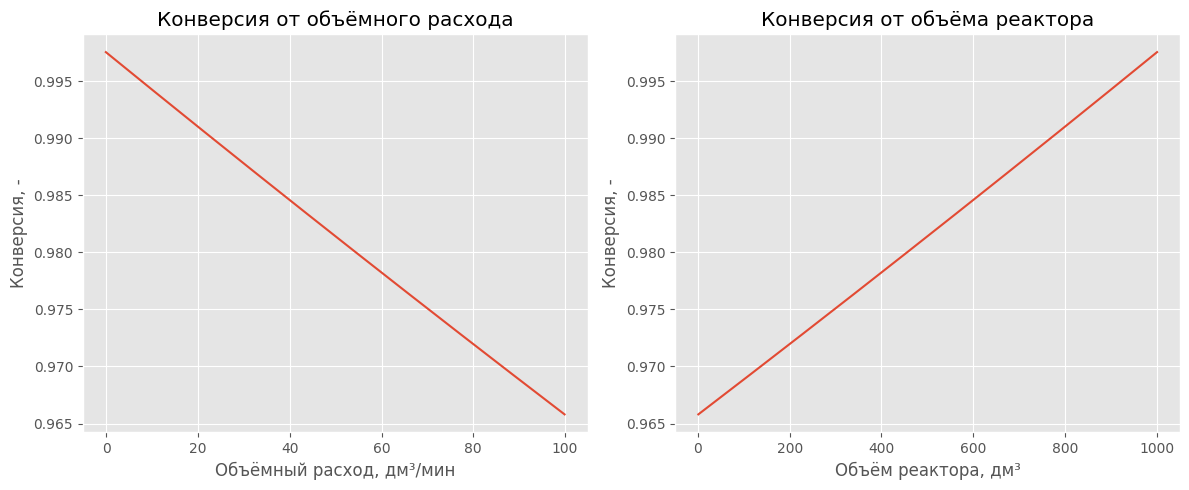

In [9]:
# 2.2

from scipy.integrate import solve_ivp

def cstr(t, c, VR, V_S, k):
    dc = np.zeros(3)
    dc[0] = (V_S / VR) * (c0[0] - c[0]) - (k[0] + k[1]) * c[0]
    dc[1] = (V_S / VR) * (c0[1] - c[1]) + k[0] * c[0]
    dc[2] = (V_S / VR) * (c0[2] - c[2]) + k[1] * c[0]
    return dc

k = np.array([2, 1])
c0 = np.array([1, 0, 0])
t_span = (0, 30)
t_eval = np.arange(0, 30, 0.1)
VR = 1000 # объем реактора
V_S = 100 # объемный расход
Usoll = 0.95 # желаемая конверсия

Ergebniss = []
i = 0
U = 1
t1 = 2
VR1 = 0

while V_S > 0 and U >= Usoll:
    i += 1
    VR1 += 1
    V_S -= 0.1
    sol = solve_ivp(cstr, t_span, c0, args=(VR, V_S, k), t_eval=[t1])
    c1 = sol.y[:, -1]
    U = (c0[0] - c1[0]) / c0[0]
    tau = VR / V_S
    e = [V_S, U, tau, VR1]
    Ergebniss.append(e)

Ergebniss = np.array(Ergebniss)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(Ergebniss[:, 0], Ergebniss[:, 1], linestyle='-')
plt.xlabel('Объёмный расход, дм\u00B3/мин')
plt.ylabel('Конверсия, -')
plt.title('Конверсия от объёмного расхода')

plt.subplot(1, 2, 2)
plt.plot(Ergebniss[:, 3], Ergebniss[:, 1], linestyle='-')
plt.xlabel('Объём реактора, дм\u00B3')
plt.ylabel('Конверсия, -')
plt.title('Конверсия от объёма реактора')

plt.tight_layout()
plt.show()

# 3 Моделирование трубчатого реактора. Расчет выхода продукта и селективности


1.   Составление и решение дифф. киетических уравнений параллельных химических реакций (B <- A -> C) для трубчатого реактора (РИВ-Н).
2.   Расчет конверсии, построение гафиков зависимости конверсии от скорости потока и длины реактора.
3.   Определить диаметр реактора, при условии обеспечения соотношения L/d > 50. Расчитать объем реактора.
4.   Расчет измерения выхода целевого продукта (В) и селективности по длине реактора с учетом расчитанного диаметра реактора.
5.   Поиск параметров реакции (константа скорости и начальные концентрации исходных веществ), при которых селективность реакции будет максимальной.

w = 0.6


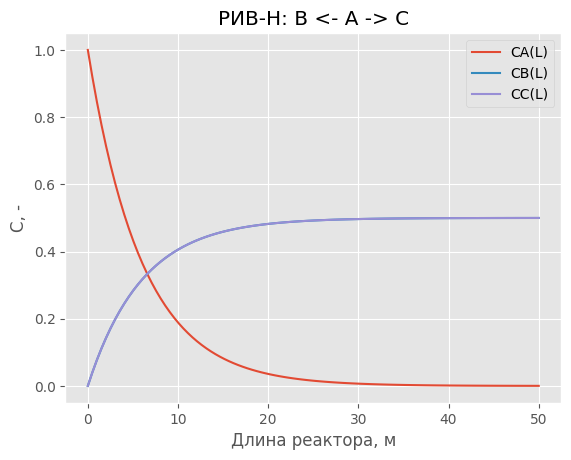

In [19]:
# 3.1

def system_of_equations_tubular_reactor(y, LR, k, w):
  CA, CB, CС = y
  dydL = [-(k[0] + k[1]) * CA / w,
          k[0] * CA / w,
          k[1] * CA / w]
  return dydL

k = [0.05, 0.05]
y0 = [1, 0, 0]

# Задаем начальные параметры:
F = 0.2 # площадь поперечного сечения, м^2
V = 0.12 # объемная скорость потока (расход), м^3/с
L = 50 # длина реактора, м

w = round((V / F), 2) # скорость течения потока, м/с
print('w =', w)

LR = np.linspace(0, L, 100) # диапазон от 0 до заданного значения длины реактора

sol1 = odeint(system_of_equations_tubular_reactor, y0, LR, args=(k, w))

plt.plot(LR, sol1[:, 0], label='CA(L)')
plt.plot(LR, sol1[:, 1], label='CB(L)')
plt.plot(LR, sol1[:, 2], label='CС(L)')
plt.title('РИВ-Н: B <- A -> C')
plt.xlabel('Длина реактора, м')
plt.ylabel('C, -')
plt.legend(loc='best')

plt.show()

U_max = 0.9997596314201163


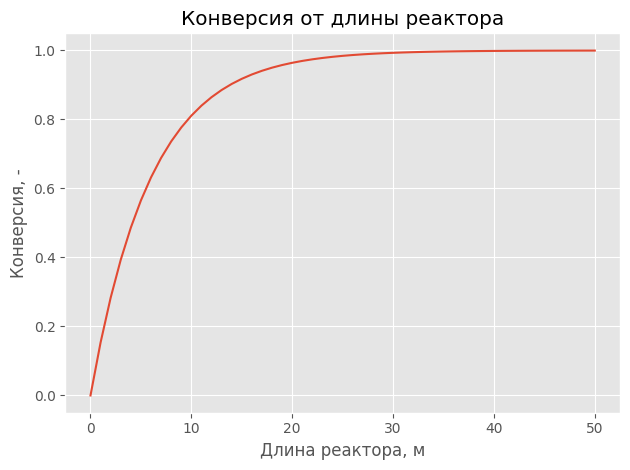

In [22]:
# 3.2

Usoll = 1 # желаемая конверсия
U = 0 # начальная конверсия
U_array = []
i = 0
l = 0

sol2 = odeint(system_of_equations_tubular_reactor, y0, np.linspace(0, L, 51), args=(k, w))
Ca = sol2[:, 0] # массив значений концентраций вещества А

while l <= L and U <= Usoll:
    U = (y0[0] - Ca[0 + i]) / y0[0]
    e = [l, U]
    U_array.append(e)
    i += 1
    l += 1

print('U_max =', U)
U_array = np.array(U_array)

plt.plot(U_array[:,0], U_array[:,1], linestyle='-')
plt.xlabel('Длина реактора, м')
plt.ylabel('Конверсия, -')
plt.title('Конверсия от длины реактора')
plt.grid(True)

plt.tight_layout()
plt.show()

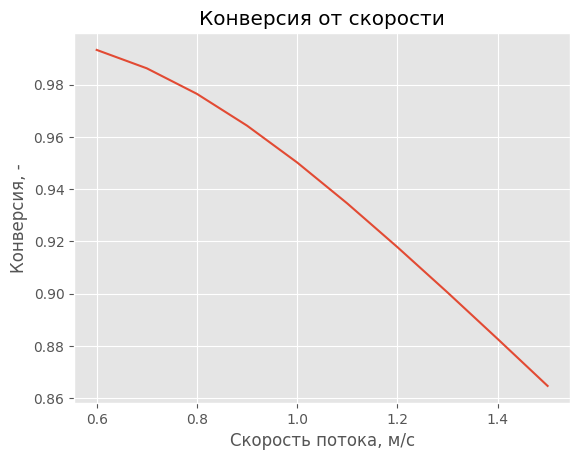

In [23]:
# 3.3

from scipy.integrate import solve_ivp

def cstr(L, y, k, w):
    dc = np.zeros(3)
    dc[0] = - (k[0] + k[1]) * y[0] / w
    dc[1] = k[0] * y[0] / w
    dc[2] = k[1] * y[0] / w
    return dc

Usoll = 1
U = 0
w_aarray = [] # массив значений скорости потока
U_array_for_w = []

# Задаем параметры для длинны, чтоб высчитывать концентрации
# на одной постоянной длине реактора (t1) :
L_span = (0, L)
t_eval = np.arange(0, L, 50)
t1 = 30
i = 0
w3 = w

while i < 50 and U <= Usoll:
  sol = solve_ivp(cstr, L_span, y0, args=(k, w3), t_eval=[t1])
  Ca = sol.y[0]
  U = (y0[0] - Ca) / y0[0]
  if w3 <= 1.6:
    U_array_for_w.append(U)
    w_aarray.append(w3)
  else: break
  i += 1
  w3 += 0.1

plt.plot(w_aarray, U_array_for_w, linestyle='-')
plt.xlabel('Скорость потока, м/с')
plt.ylabel('Конверсия, -')
plt.title('Конверсия от скорости')

plt.show()

In [24]:
# 3.4

import math

F = 0.2 # площадь поперечного сечения, м^2
V = 0.12 # объемная скорость потока (расход), м^3/с

d = round(math.sqrt(4*F/math.pi), 1) # диаметр реактора, м

L4 = 35 # длинаа реактора, м
while True:
  if L4 > d * 50:
    break
  else:
    L4 += 1
w4 = V / F # скорость течения потока, м/с
VR = L4 * F # объем реактора, м^3
t = round(VR / V) # время реакции, с

L = L4
w = w4

print('V =', V, 'м\u00B3/с\nF =', F, 'м\u00B2/с\nL =', L4, 'м\nd =', d,
      'м\nL/d (',round(L4/d, 1),') > 50 -->', L4/d > 50,
      '\nw =', w4, 'м/с\nt =', t, 'с\nVR =', VR, 'м\u00B3')

V = 0.12 м³/с
F = 0.2 м²/с
L = 35 м
d = 0.5 м
L/d ( 70.0 ) > 50 --> True 
w = 0.6 м/с
t = 58 с
VR = 7.0 м³


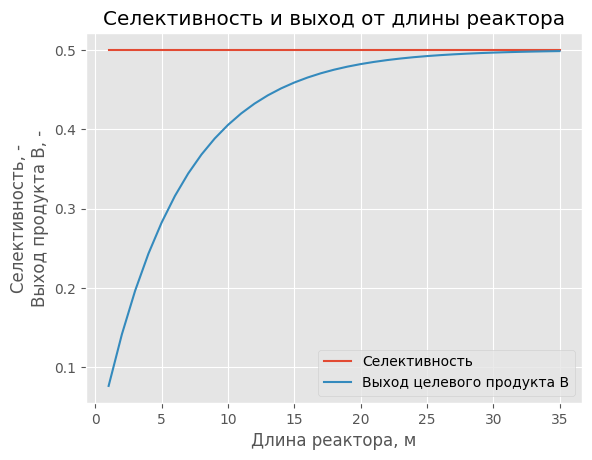

In [25]:
# 3.5

Asoll = 1 # желаемый выход продукта
Sbsoll = 1 # желаемая селективность
Usoll = 1 # желаемая конверсия
A = 0 # начальный выход продукта
Sb = 0 # начальная селективность
U = 0 # начальная конверсия

A_array = []
Sb_array = []
U_array = []
L_for_graf = []

L_span = (0, L)
step = 1
t_eval = np.arange(0, L, step)
i = 1 # не можем делить на 0, а Сb изначально = 0

while i <= L and U < Usoll and A < Asoll and Sb < Sbsoll:
  t1 = i
  sol = solve_ivp(cstr, L_span, y0, args=(k, w), t_eval=[t1])
  Ca = sol.y[0]
  Cb = sol.y[1]

  A = Cb[0] / y0[0]
  U = (y0[0] - Ca[0]) / y0[0]
  Sb = A / U

  A_array.append(A)
  U_array.append(U)
  Sb_array.append(Sb)
  L_for_graf.append(t1)

  i += step

plt.plot(L_for_graf, Sb_array, label='Селективность')
plt.plot(L_for_graf, A_array, label='Выход целевого продукта В')
plt.xlabel('Длина реактора, м')
plt.ylabel('Селективность, -\nВыход продукта В, -')
plt.title('Селективность и выход от длины реактора')
plt.grid(True)
plt.legend(loc='best')
plt.show()

Максимально возможная селективность = 0.9966778835753438
Сa = 0.9999999999999972 
Сb = 1.6101149929449238e-15 
Сc = -4.308170520802539e-16 
k1 = 0.30001293036385834 
k2 = 0.0009999999999960874


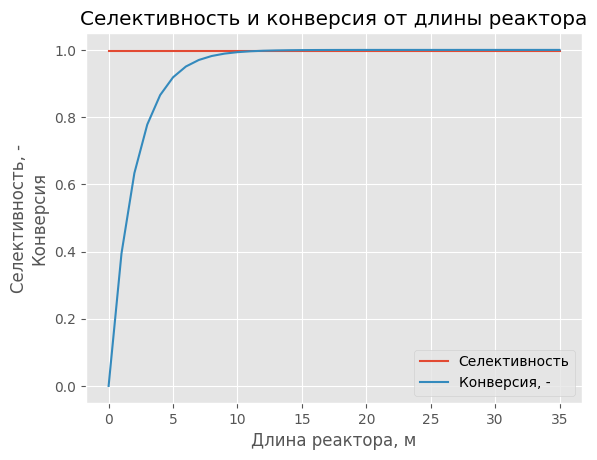


Можно уменьшить длину труб до L = 26 м


In [17]:
# 3.6

from scipy.optimize import minimize, LinearConstraint

# Задаем ограничения на начальные концентрации (первые 3 компоненты)
# и коэфф скорости (последние 2 комп) :
A_const = np.array([[1,-2,-2,0,0],[1,0,0,0,0],[0,1,0,0,0],[0,0,1,0,0],[0,0,0,1,0], [0,0,0,0,1]])

# Задаем линейное ограничение на переменные типа lb <= A.dot(x) <= ub :
cons = LinearConstraint(A_const, lb=[1,0.1,0,0,0.001,0.001], ub=[np.inf,1,1,1,1,1])
t1 = L

def fun_to_min(x,w):
  y0 = np.array(x[0:3]) # вытаскиваем из массива концентрации
  k = x[3:5] # вытаскиваем коэфф. скорости
  sol = solve_ivp(cstr, L_span, y0, args=(k, w), t_eval=[t1])
  Ca = sol.y[0]
  Cb = sol.y[1]

  A = Cb / y0[0]
  U = (y0[0] - Ca) / y0[0]
  Sb = A / U
  return 1/Sb # получаем максимальную селективность

x = np.zeros(5)
x[0]=y0[0]
x[1]=y0[1]
x[2]=y0[2]
x[3]=k[0]
x[4]=k[1]
min = minimize(fun_to_min, x, args=(w), constraints=cons) # вызов функции минимизации

print("Максимально возможная селективность =", 1/min.fun)
print("Сa =", min.x[0], "\nСb =", min.x[1], "\nСc =", min.x[2],
      "\nk1 =", min.x[3], "\nk2 =", min.x[4])

U_for_graf = []
L_for_graf = []
Sb_array = []

k6 = [min.x[3], min.x[4]]
y0_6 = [min.x[0], min.x[1], min.x[2]]
U = 0
i = 0

while i <= L:
  t1 = i
  sol = solve_ivp(cstr, L_span, y0_6, args=(k6, w), t_eval=[t1])
  Ca = sol.y[0]
  U = (y0[0] - Ca[0]) / y0[0]
  if U <= Usoll:
    U_for_graf.append(U)
    L_for_graf.append(t1)
    Sb_array.append(1/min.fun)
  else: break
  i += step

plt.plot(L_for_graf, Sb_array, label='Селективность')
plt.plot(L_for_graf, U_for_graf, label='Конверсия, -')
plt.xlabel('Длина реактора, м')
plt.ylabel('Селективность, -\nКонверсия')
plt.title('Селективность и конверсия от длины реактора')
plt.grid(True)
plt.legend(loc='best')
plt.show()

j = 0
while j <= len(L_for_graf):
  if L_for_graf[j] > d * 50:
    L_6 = L_for_graf[j]
    break
  else:
    j += 1
print("\nМожно уменьшить длину труб до L =",L_6, "м")

# 4 Решение задач безусловной оптимизации
Рещение задачи безусловной оптимизации методом наименьших квадратов. Подобрать параметры регриссионной зависимости и оценить адекватность полученного уравнения регрессии с помощью коэффицента детерминации, эмпирического корреляционного отношения, критерия Фишера (табличное значение F-распределения Фишера при уровне значимости 0.05, числе степеней свободы числителя 6 и чзнаменателя 5 равно 4.950).

k0 = 26747.469 
E = 31009.634 Дж/моль



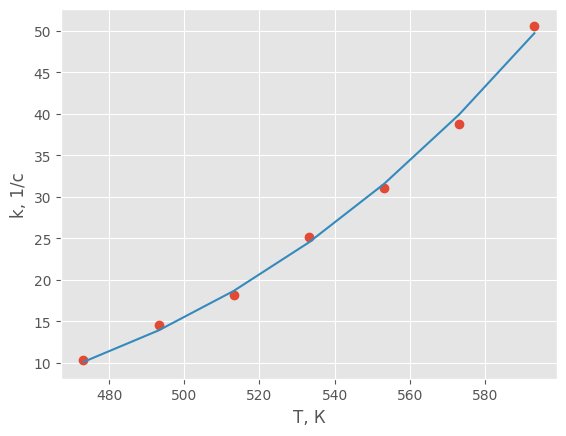


Остаточная дисперсия = 0.737

Дисперсия среднего = 204.546

Расчетное значение критерия Фишера = 277.539 
Табличное значение критерия Фишера = 4.950

Эмпирическое корелляционное отношение = 0.998

Коэффицент детерминации = 0.997


In [27]:
# 4
import scipy
from scipy.optimize import least_squares

t = [200, 220, 240, 260, 280, 300, 320] # в Цельсия
k = np.array([10.3, 14.6, 18.1, 25.2, 31.0, 38.8, 50.6])
R = scipy.constants.Avogadro * scipy.constants.Boltzmann

for i in range(len(t)):
    t[i] += 273.15
T = np.array(t) # в Кельвинах

def Arrhenius_equation(x, T, k, R):
    return x[0] * np.exp(-x[1] / (R * T)) - k

x0 = np.array([0.1, 0.1])

res_lsq = least_squares(Arrhenius_equation, x0, args=(T, k, R))
print('k0 =', round(res_lsq.x[0],3), '\nE =', round(res_lsq.x[1],3), 'Дж/моль\n')

# для графичка
from numpy.random import default_rng
rng = default_rng()
def gen_data(t, a, b, R, noise=0., n_outliers=0, seed=None):
    rng = default_rng(seed)

    y = a * np.exp(-b / (R * t))

    error = noise * rng.standard_normal(t.size)
    outliers = rng.integers(0, t.size, n_outliers)
    error[outliers] *= 10

    return y + error

y_lsq = gen_data(T, *res_lsq.x, R)

plt.plot(T, k, 'o')
plt.plot(T, y_lsq)
plt.xlabel("T, К")
plt.ylabel("k, 1/с")
plt.show()

def Sd(y, y_exp, n, p):
    return round(1 / (n - p) * ((y - y_exp)**2).sum(), 3)

Sd = Sd(k, y_lsq, 7, 2)
print("\nОстаточная дисперсия =", Sd)

def Ssr(y, n):
    y_bar = y.mean() # средняя
    return round(1 / (n - 1) * ((y - y_bar)**2).sum(), 3)

Ssr = Ssr(k, 7)
print("\nДисперсия среднего =", round(Ssr, 3))

print('\nРасчетное значение критерия Фишера =', round(Ssr/Sd,3),
      '\nТабличное значение критерия Фишера = 4.950')

print("\nЭмпирическое корелляционное отношение =", round(np.sqrt(1-(Sd/Ssr)), 3))

from sklearn.metrics import r2_score
r2 = r2_score(k, y_lsq)
print("\nКоэффицент детерминации =", round(r2, 3))